#**Introduction Pratique au Deep Learning avec TensorFlow/Keras**

###**Objectif :** Ce notebook vise à expliquer les fondements des Réseaux de Neurones Artificiels (ANN) et à démontrer comment créer, entraîner et évaluer un modèle de Deep Learning étape par étape.

###**Qu'est-ce que le Deep Learning ?** C'est un sous-domaine de l'intelligence artificielle inspiré par le fonctionnement du cerveau humain. Il utilise des couches de neurones artificiels pour apprendre des motifs complexes à partir de données brutes.

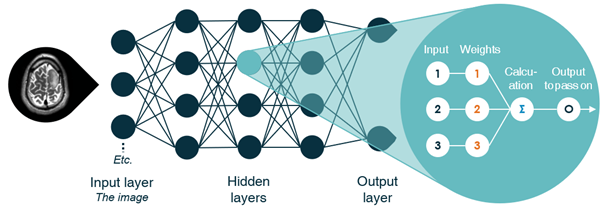

####**Overview :**

##### The provided image is a visualization of a feedforward neural network, a fundamental architecture in artificial intelligence and machine learning. It illustrates how information flows from an input layer, through one or more hidden layers, to an output layer. Each layer consists of nodes, or neurons, which are interconnected, with the strength of these connections represented by weights that are adjusted during the learning process.

#### **Input Layer :**

##### The process begins at the input layer, shown in green. This layer receives the raw data that the network will learn from. Each node in this layer, labeled from x₁ to xn, represents a single feature or attribute of the input data. For example, in an image recognition task, these could be the pixel values of an image.

#### **Input Nodes:**


The input nodes themselves, such as x₁ and x₂, do not perform any computation. They simply pass the input values to the next layer. The arrows originating from these nodes indicate the direction of information flow, which is strictly forward in this type of network.

#### **hidden layer :**

Next in the flow are the hidden layers, represented here in blue. These layers are where the majority of the computation occurs. Each node in the hidden layer receives inputs from all the nodes in the previous layer, as shown by the connecting lines.

#### **Hidden Nodes :**

The nodes in the hidden layer, labeled from h(1)₁ to h(1)m, compute a weighted sum of their inputs and then apply a non-linear activation function to this sum. This non-linearity is crucial, as it allows the network to learn complex patterns and relationships within the data. The superscript (1) indicates that this is the first hidden layer; a deep neural network would have multiple such layers.

#### **Output Layer :**

Finally, the information flows to the output layer, shown in red. This layer produces the final result of the network's computation. The number of nodes in this layer depends on the specific task; for example, in a classification problem with 'k' classes, there would be 'k' output nodes, each representing the probability of the input belonging to a particular class.

#### **Output Nodes :**


The output nodes, labeled from y₁ to yk, also receive inputs from the previous layer and perform a computation. The output of these nodes represents the network's prediction or decision. For instance, in a regression problem, a single output node might predict a continuous value.

#### **Connections and Weights :**

The lines connecting the nodes between layers represent the weights of the neural network. These weights are the parameters that the network learns during the training process. Each connection has an associated weight that scales the signal passing through it, effectively determining the influence of one neuron on another.

### **1. Préparer Notre Boîte à Outils (Importation des Bibliothèques)**

####Dans le monde de la programmation, pour accomplir des tâches complexes (comme le Deep Learning), on utilise des bibliothèques. Ce sont des ensembles de codes prêts à l'emploi qui nous font gagner beaucoup de temps.

####Imaginez que vous construisez une maison : ces bibliothèques sont votre marteau, vos clous et votre mètre.



#### Avant de commencer à coder, voici un aperçu des bibliothèques essentielles que nous allons importer. Elles forment la base de notre environnement de travail.

|  Bibliothèque |  Rôle dans le Deep Learning |  Analogie Simple |
| :--- | :--- | :--- |
| **`numpy`** | Gère les tableaux de nombres (matrices) pour une manipulation de données rapide et efficace. | **La Calculatrice** pour les gros chiffres. |
| **`matplotlib.pyplot`** | Permet de dessiner des graphiques pour visualiser les données et suivre l'évolution de l'entraînement de notre modèle. | **Le Dessinateur** pour voir nos résultats. |
| **`tensorflow`** | La plateforme qui exécute tous les calculs complexes et lourds du Deep Learning. | **Le Moteur Puissant** du système. |
| **`tensorflow.keras`** | Une interface simple qui nous permet de **construire** le réseau de neurones avec des commandes claires. | **L'Interface Simple** pour utiliser le moteur. |



In [2]:
import numpy as np                       # Permet de manipuler facilement les données numériques
import matplotlib.pyplot as plt          # Pour visualiser nos données et les performances
import tensorflow as tf                  # Le moteur principal du Deep Learning
from tensorflow import keras             # La couche simple pour construire rapidement des modèles
from tensorflow.keras import layers      # Pour définir les couches de notre réseau

print("Toutes les bibliothèques sont chargées !")
print("Version de TensorFlow utilisée :", tf.__version__)

Toutes les bibliothèques sont chargées !
Version de TensorFlow utilisée : 2.19.0


##  **2. Le Carburant du Modèle : Préparation des Données**

Si les bibliothèques sont nos outils, **les données sont le carburant** de notre moteur de Deep Learning. Un modèle ne peut apprendre que si les données sont dans un format qu'il peut comprendre et traiter efficacement.

### Étapes Essentielles pour Préparer la Data :

1.  **Être Numérique :** Une machine ne peut pas comprendre une image directement. Elle voit une grille de nombres (les pixels), chaque nombre représentant une couleur ou une intensité. C'est pourquoi toutes nos données doivent être converties en chiffres.
2.  **La Normalisation :** C'est l'étape la plus importante. Nos données brutes (les pixels) vont de 0 à 255. Pour faciliter et accélérer les calculs mathématiques du modèle, nous allons **ramener toutes ces valeurs entre 0 et 1**.
    * *Pourquoi ?* Cela assure une **convergence** plus stable et plus rapide de l'entraînement.


3.  **L'Aplatissement (Flattening) :** Nos images sont des grilles 28 pixels par 28 pixels. Le réseau de neurones a besoin d'une **longue liste unique de nombres** en entrée (un vecteur). Nous allons donc transformer la grille 28x28 en une liste unique de $784$ nombres $(28 \times 28 = 784)$.



Nous allons utiliser Matplotlib pour afficher une grille de 25 images et vérifier leurs étiquettes (labels) correspondantes.

* **Rappel :** Les données `x_train` sont actuellement un vecteur de 784 nombres. Pour les afficher comme une image, nous devons les **re-transformer** temporairement en une grille 28x28.

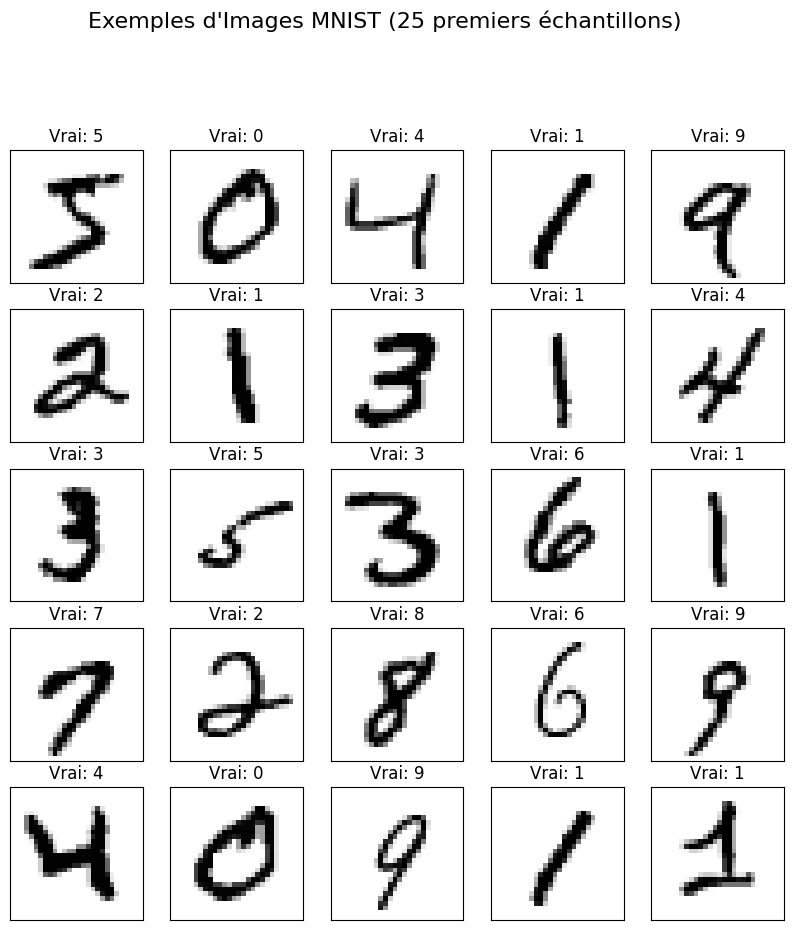

In [9]:
# Nous allons afficher les 25 premières images du jeu d'entraînement.

plt.figure(figsize=(10, 10))       # Définir la taille de la figure
for i in range(25):
    plt.subplot(5, 5, i + 1)             # Créer un sous-graphique pour chaque image (grille de 5x5)
    plt.xticks([])                       # Masquer les axes (ils ne sont pas utiles ici)
    plt.yticks([])
    plt.grid(False)
    image_28x28 = x_train[i].reshape(28, 28)      # Afficher l'image. On utilise reshape pour passer de 784 à 28x28.
    plt.imshow(image_28x28, cmap=plt.cm.binary)   # 'cmap=plt.cm.binary' affiche les images en niveaux de gris.

                                                  # Afficher le vrai chiffre au-dessus de l'image (le label)
    plt.title(f"Vrai: {y_train[i]}")

plt.suptitle("Exemples d'Images MNIST (25 premiers échantillons)", y=1.02, fontsize=16)
plt.show()


### Le Dataset MNIST : Le "Hello World" du Deep Learning

Nous allons utiliser le célèbre dataset **MNIST**, qui contient $70,000$ images de chiffres manuscrits (de 0 à 9). C'est le point de départ universel pour apprendre le Deep Learning.

In [3]:
# 1. Chargement du dataset MNIST
# Keras a déjà ce dataset intégré, ce qui facilite grandement le chargement.

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Le dataset est divisé en :
# x_train (images pour l'entraînement)
# y_train (les étiquettes/réponses pour x_train, ex: "c'est un 5")
# x_test et y_test (pour tester le modèle une fois qu'il a fini d'apprendre)

# 2. Normalisation des données (de 0-255 à 0-1)
# On convertit en "float32" pour avoir des nombres décimaux (pour la division)

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# 3. Aplatissement (Flattening) : Transformer la grille 28x28 en vecteur de 784
# La fonction reshape((-1, 784)) permet de le faire automatiquement.

x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# Affichage des dimensions pour vérification

print("--- Vérification des Dimensions ---")
print(f"Images d'entraînement (X_train) : {x_train.shape}")           # Devrait être (60000, 784)
print(f"Étiquettes d'entraînement (Y_train) : {y_train.shape}")       # Devrait être (60000,)
print(f"Images de test (X_test) : {x_test.shape}")                    # Devrait être (10000, 784)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
--- Vérification des Dimensions ---
Images d'entraînement (X_train) : (60000, 784)
Étiquettes d'entraînement (Y_train) : (60000,)
Images de test (X_test) : (10000, 784)


## **3. Création du "Cerveau" : Architecture du Réseau de Neurones Artificiels (ANN)**

Le Réseau de Neurones Artificiels **(ANN)** est la structure que nous construisons pour apprendre à partir des données. Imaginez-le comme une chaîne de montage d'usine : l'information **(les pixels de l'image)** entre d'un côté et la décision **(quel chiffre est-ce ?)** sort de l'autre.

### **Le Modèle Séquentiel**

Nous utilisons un **Modèle Séquentiel** de Keras, ce qui signifie que les couches de neurones sont empilées les unes après les autres, de manière linéaire.

### **Les Trois Types de Couches (Layers)**

| Couche | Rôle | Description Détaillée |
| :--- | :--- | :--- |
| **Couche d'Entrée (`Input`)** | Reçoit l'information brute. | Elle prend nos **784** nombres (le vecteur aplati de l'image MNIST) et les transmet à la suite. |
| **Couches Cachées (`Dense`)** | Le lieu où l'apprentissage se produit. | Elles traitent l'information. Nous utilisons la **fonction d'activation ReLU** (Rectified Linear Unit), qui décide si un neurone est "actif" ou non. C'est ce qui introduit la non-linéarité et permet au modèle de résoudre des problèmes complexes. |
| **Couche de Sortie (`Dense`)** | Donne le résultat final. | Elle possède **10 neurones** (un pour chaque chiffre de 0 à 9). L'**activation Softmax** est utilisée ici pour convertir les résultats en **probabilités** (par exemple : 95% de chances que ce soit un '5', 2% que ce soit un '3', etc.). |

In [4]:
# Nous définissons notre modèle comme une séquence (un empilement de couches)

model = keras.Sequential([                           # COUCHE D'ENTRÉE : Elle reçoit nos 784 pixels normalisés.
                                                     # Le 'shape' (784,) indique le format des données entrantes.
    layers.Input(shape=(784,)),

                                                     # COUCHE CACHÉE 1 : 128 neurones pour commencer à analyser les formes.
                                                     # 'relu' (Rectified Linear Unit) est la fonction d'activation standard.
    layers.Dense(128, activation='relu'),

                                                     # COUCHE CACHÉE 2 : 64 neurones pour affiner l'analyse des motifs.
    layers.Dense(64, activation='relu'),

                                                     # COUCHE DE SORTIE : 10 neurones, car nous avons 10 classes (chiffres 0 à 9).
                                                     # 'softmax' garantit que la somme des 10 probabilités est égale à 1.
    layers.Dense(10, activation='softmax')
])

# Afficher un résumé de la structure du modèle (nombre de couches, paramètres à apprendre)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### **5. La Phase d'Apprentissage : Compilation et Entraînement**

Avant de donner les données d'entraînement au modèle, nous devons le **compiler**. La compilation est l'étape où nous définissons les **règles du jeu** pour l'apprentissage.

###  **Les Règles du Jeu (Compilation)**

1.  **L'Optimiseur (`optimizer='adam'`) : Le GPS du Modèle**
    * C'est l'algorithme qui va **ajuster les poids** (les connexions entre les neurones) après chaque erreur. Il sert à guider le modèle vers la solution la plus précise. `Adam` est un choix excellent et très courant.
2.  **La Fonction de Perte (`loss=...`) : Le Scorecard**
    * Elle mesure l'**erreur** du modèle. Plus le score (la perte) est faible, plus le modèle est bon. Pour notre problème de classification de chiffres, nous utilisons `sparse_categorical_crossentropy`.
3.  **Les Métriques (`metrics=['accuracy']`) : Le Bulletin de Notes**
    * C'est la mesure que nous utilisons pour juger la performance. L'**`accuracy`** (précision) nous donne le pourcentage de prédictions correctes.

### **L'Entraînement (`model.fit`)**

L'entraînement lui-même se fait via la fonction `model.fit()`.

* **`epochs=5` :** C'est le nombre de fois où le modèle va parcourir l'**intégralité** de nos données d'entraînement.
* **`validation_split=0.2` :** Nous mettons de côté 20% des données d'entraînement. Cela permet de vérifier la performance du modèle *pendant* l'apprentissage et d'éviter qu'il ne fasse du "par cœur" (surapprentissage).

In [5]:
# 1. Compilation du Modèle : Définir la méthode d'apprentissage

model.compile(
    optimizer='adam',                                # L'optimiseur (Adam) : La méthode pour ajuster les connexions (poids)
    loss='sparse_categorical_crossentropy',          # La fonction de perte : Comment mesurer l'erreur
    metrics=['accuracy']                             # Les métriques : Ce que nous voulons voir (le pourcentage de bonnes réponses)
)

# 2. Entraînement du Modèle : Le Démarrage de l'Apprentissage
print("Début de l'entraînement...")


history = model.fit(
    x_train,                      # Les images à utiliser pour apprendre
    y_train,                      # Les vraies réponses (labels)
    epochs=5,                     # Le modèle va voir les données 5 fois
    batch_size=32,                # Il traite les données par petits lots de 32 images à la fois
    validation_split=0.2          # 20% des données d'entraînement sont utilisées pour la validation
)

print("Entraînement terminé !")

Début de l'entraînement...
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8656 - loss: 0.4616 - val_accuracy: 0.9571 - val_loss: 0.1439
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9647 - loss: 0.1172 - val_accuracy: 0.9687 - val_loss: 0.1006
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9773 - loss: 0.0758 - val_accuracy: 0.9727 - val_loss: 0.0959
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9831 - loss: 0.0521 - val_accuracy: 0.9740 - val_loss: 0.0925
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9869 - loss: 0.0403 - val_accuracy: 0.9711 - val_loss: 0.1000
Entraînement terminé !


##  **6. Conclusion : Évaluation et Prédiction**

Le modèle a terminé son entraînement. Nous devons maintenant répondre à deux questions :

1.  **Est-il performant ?** Pour cela, nous utilisons les données de test (`x_test` et `y_test`), c'est-à-dire les images que le modèle n'a **jamais vues**. Si la précision est élevée sur ce jeu de données, cela signifie que le modèle est capable de **généraliser** ses connaissances.
2.  **Comment fait-il une prédiction ?** Nous allons tester le modèle sur une seule image pour voir le résultat en probabilités (grâce à Softmax) et déterminer son choix final.

### **Les Fonctions Clés**

* **`model.evaluate()` :** Donne le score final de la précision globale du modèle.
* **`model.predict()` :** Permet d'obtenir la prédiction pour une ou plusieurs nouvelles données. La fonction `np.argmax()` nous donne l'indice de la probabilité la plus élevée (le chiffre choisi par le modèle).

--- Évaluation du Modèle ---

Perte sur le jeu de test : 0.0874
Précision finale (Accuracy) : 97.46%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


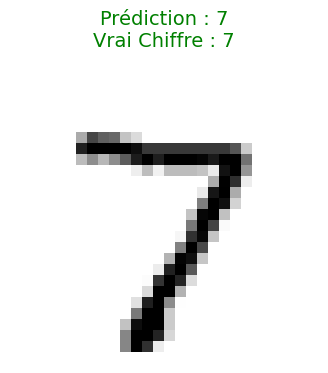


--- Résultat du Test ---
Le modèle a prédit le chiffre : 7
Le vrai chiffre est : 7


In [10]:
# 1. Évaluation Globale sur les Données de Test

print("--- Évaluation du Modèle ---")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"\nPerte sur le jeu de test : {test_loss:.4f}")
print(f"Précision finale (Accuracy) : {test_acc * 100:.2f}%")


# 2. Faire une Prédiction sur un Exemple Unique (la première image du jeu de test)

# Récupérer la prédiction (une liste de 10 probabilités)
prediction = model.predict(x_test[:1])

# np.argmax() trouve l'indice de la probabilité la plus forte, qui est le chiffre prédit.
chiffre_predit = np.argmax(prediction)
vrai_chiffre = y_test[0]

# --- AJOUT : AFFICHAGE DE L'IMAGE TESTÉE ---

# 1. Remodeler l'image de 784 nombres à 28x28 pixels pour l'affichage
image_a_afficher = x_test[0].reshape(28, 28)

# 2. Affichage avec Matplotlib
plt.figure(figsize=(4, 4))
plt.imshow(image_a_afficher, cmap=plt.cm.binary) # Afficher en noir et blanc

# 3. Mettre le résultat en titre
plt.title(f"Prédiction : {chiffre_predit}\nVrai Chiffre : {vrai_chiffre}",
          fontsize=14,
          color='green' if chiffre_predit == vrai_chiffre else 'red')
plt.axis('off') # Cacher les axes pour un meilleur rendu visuel
plt.show()

print("\n--- Résultat du Test ---")
print(f"Le modèle a prédit le chiffre : {chiffre_predit}")
print(f"Le vrai chiffre est : {vrai_chiffre}")

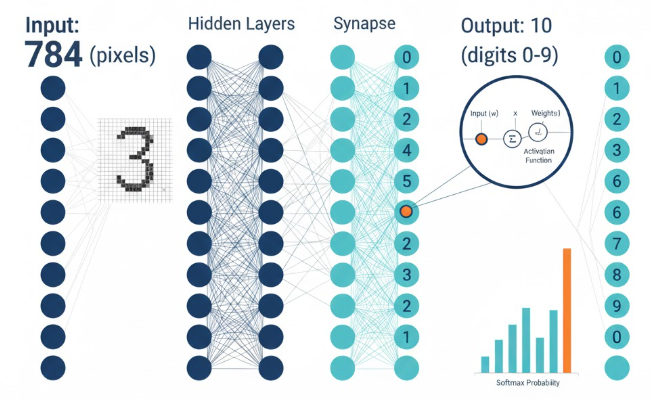

## **7. Visualisation de l'Apprentissage (Historique)**

Pour juger de la performance de notre modèle et s'assurer qu'il a bien appris sans faire de "par cœur", nous devons visualiser l'historique d'entraînement (l'objet `history` capturé à l'étape 5).

### **Pourquoi visualiser ?**

1.  **Suivre la Perte (Loss) :** Idéalement, la perte d'entraînement et la perte de validation doivent toutes deux diminuer.
2.  **Suivre la Précision (Accuracy) :** La précision doit augmenter.
3.  **Détecter le Surapprentissage (Overfitting) :** Si la ligne de Précision d'Entraînement devient beaucoup plus haute que la ligne de Précision de Validation, c'est un signe de surapprentissage.

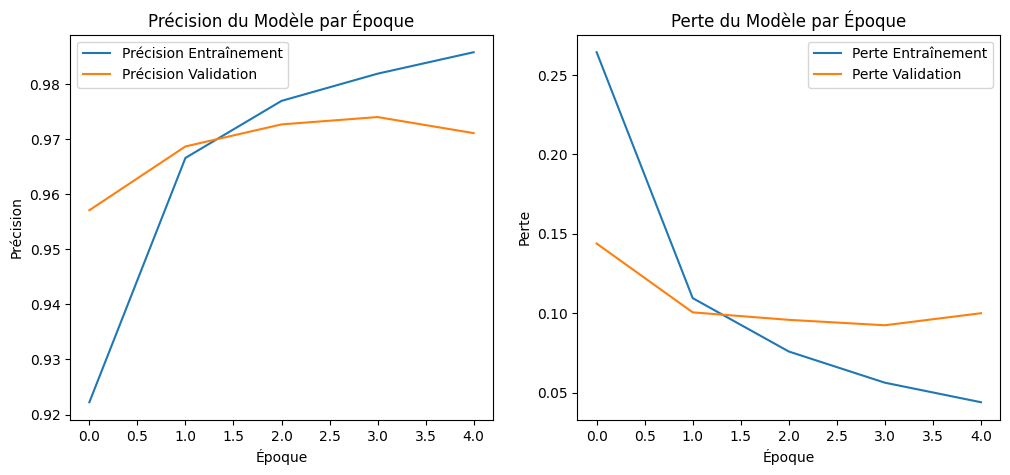

In [7]:
# 1. Visualisation de la Précision (Accuracy)

plt.figure(figsize=(12, 5)) # Créer une figure pour les graphiques

plt.subplot(1, 2, 1) # Positionner le premier graphique
plt.plot(history.history['accuracy'], label='Précision Entraînement')
plt.plot(history.history['val_accuracy'], label='Précision Validation')
plt.title('Précision du Modèle par Époque')
plt.ylabel('Précision')
plt.xlabel('Époque')
plt.legend()


# 2. Visualisation de la Perte (Loss)

plt.subplot(1, 2, 2) # Positionner le deuxième graphique
plt.plot(history.history['loss'], label='Perte Entraînement')
plt.plot(history.history['val_loss'], label='Perte Validation')
plt.title('Perte du Modèle par Époque')
plt.ylabel('Perte')
plt.xlabel('Époque')
plt.legend()

plt.show() # Afficher les deux graphiques

## **8. Évaluation Avancée : La Matrice de Confusion**

La précision globale est utile, mais la Matrice de Confusion est essentielle. Elle montre le nombre de fois où le modèle a prédit correctement chaque classe, et surtout, les classes qu'il a tendance à confondre.

Pour cela, nous devons importer la bibliothèque **Scikit-learn (sklearn)**.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


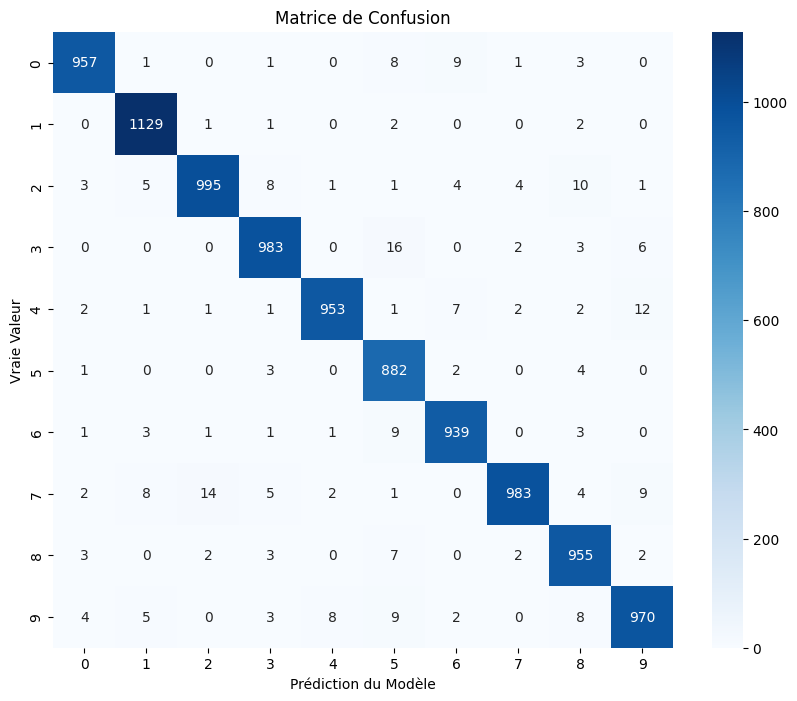

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns # Pour une visualisation plus belle

# 1. Faire des prédictions sur le jeu de test
y_pred_proba = model.predict(x_test)
# Convertir les probabilités en la classe prédite (le chiffre avec la probabilité la plus élevée)
y_pred = np.argmax(y_pred_proba, axis=1)

# 2. Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# 3. Afficher la matrice
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Matrice de Confusion')
plt.ylabel('Vraie Valeur')
plt.xlabel('Prédiction du Modèle')
plt.show()

## **9. Sauvegarde et Chargement du Modèle (Persistance)**

Pour qu'un modèle soit utilisable dans une application, il doit être sauvegardé. Cette étape enregistre l'architecture du réseau et surtout tous les poids (les connaissances apprises) dans un seul fichier.

In [12]:
import os
# Définir le nom du fichier
nom_fichier = 'modele_mnist_entraine.keras'

# 1. Sauvegarde du modèle (avec tous ses poids)
model.save(nom_fichier)
print(f"Modèle sauvegardé sous : {nom_fichier}")

# --- Optionnel : Tester le chargement du modèle ---
print("\nTest de chargement...")
modele_charge = keras.models.load_model(nom_fichier)

# 2. Vérifier que le modèle chargé fonctionne
loss_charge, acc_charge = modele_charge.evaluate(x_test, y_test, verbose=0)
print(f"Précision du modèle chargé : {acc_charge * 100:.2f}%")

Modèle sauvegardé sous : modele_mnist_entraine.keras

Test de chargement...
Précision du modèle chargé : 97.46%


## **10. Conclusion et Prochaines Étapes**

Ce Notebook a permis de construire et d'entraîner avec succès un Réseau de Neurones Artificiels pour la classification des chiffres MNIST, atteignant une précision de [Inclure la précision finale de l'étape 6 ici]%.

### **Suggestions d'Amélioration (Futurs Travaux) :**

* **Régularisation :** Ajouter des couches `Dropout` pour réduire le surapprentissage (overfitting).
* **CNN :** Remplacer l'ANN par un **Réseau Neuronal Convolutif (CNN)**, qui est l'architecture standard et plus performante pour les problèmes d'images.
* **Hyperparamètres :** Tester différents nombres de couches et de neurones pour optimiser les performances.